In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
#from sklearn.model_selection import train_val_split
import joblib
import pandas as pd

In [8]:
X_train = pd.read_csv("data/csvTrainImages 13440x1024.csv")
y_train = pd.read_csv("data/csvTrainLabel 13440x1.csv")
y_train = y_train -1 #labels start from 0

X_test = pd.read_csv("data/csvTestImages 3360x1024.csv")
y_test = pd.read_csv("data/csvTestLabel 3360x1.csv")
y_test = y_test -1 

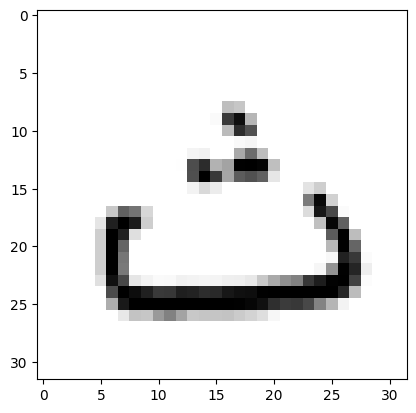

In [9]:
# Plot the digits: each image is 32x32 pixels
import cv2
image_ex = np.array(X_train)[30].reshape(32, 32)
#reverse each column
image_ex= image_ex.T
#image_val = image_test[:, ::-1]

plt.imshow(image_ex, cmap='binary')

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

X_train_DL = np.array(X_train).reshape((X_train.shape[0], 32, 32, 1))
X_test_DL = np.array(X_test).reshape((X_test.shape[0], 32, 32, 1))
X_train_DL = X_train_DL.astype('float32') / 255
X_test_DL = X_test_DL.astype('float32') / 255

# Convert labels to categorical
num_classes = 28
y_train_DL = to_categorical(y_train, num_classes)
y_test_cat_DL = to_categorical(y_test, num_classes)

In [6]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'),
    Flatten(),
    Dense(128, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(X_train_DL, y_train_DL, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_DL, y_test_cat_DL, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

/home/fhakym/Documents/Github_projects/Calculator_quizz_streamlit/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-26 08:30:21.156484: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │         3,612 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 190,556 (744.36 KB)

 Trainable params: 190,556 (744.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.2060 - loss: 2.7265 - val_accuracy: 0.6793 - val_loss: 1.0229
Epoch 2/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.6456 - loss: 1.0739 - val_accuracy: 0.8088 - val_loss: 0.5984
Epoch 3/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.7750 - loss: 0.6698 - val_accuracy: 0.8415 - val_loss: 0.4502
Epoch 4/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8399 - loss: 0.4840 - val_accuracy: 0.8720 - val_loss: 0.4044
Epoch 5/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8718 - loss: 0.3905 - val_accuracy: 0.8936 - val_loss: 0.3262
Epoch 6/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.8922 - loss: 0.3297 - val_accuracy: 0.8839 - val_loss: 0.3412
Epoch 7/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9092 - loss: 0.2746 - val_accuracy: 0.9055 - val_loss: 0.2864
Epoch 8/20
378/378 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9163 - loss: 0.2352 - val_accu

In [7]:
# Save the model
model.save('cnn_model.h5')

In [4]:
import tensorflow as tf

model = tf.keras.models.load_model('app/cnn_model.h5')

2024-10-30 11:14:33.687816: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [5]:
# Make predictions on test data
y_pred_DL = model.predict(X_test_DL)
y_pred_classes_DL = np.argmax(y_pred_DL, axis=1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_DL, y_test_cat_DL, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

NameError: name 'X_test_DL' is not defined

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2


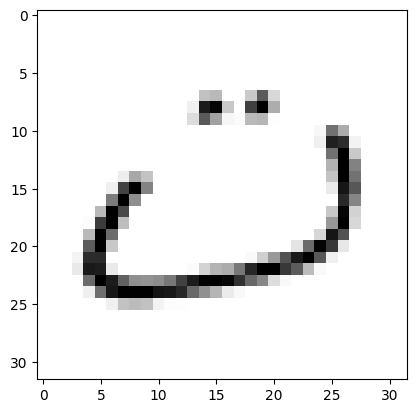

In [23]:
#test prediction on a single image
image_test = np.array(X_test)[3].reshape(32, 32, 1)
image_test = image_test.astype('float32') / 255

# Make predictions on the test image
y_pred_DL = model.predict(image_test.reshape(1, 32, 32, 1))
y_pred_classes_DL = np.argmax(y_pred_DL, axis=1)
print(y_pred_classes_DL[0])

# Plot the image
import matplotlib.pyplot as plt
image_test = image_test.T
plt.imshow(image_test.reshape(32, 32), cmap='binary')
plt.show()


In [53]:
arabic_phonetic = {
    'ا': 'alif',
    'ب': 'baa',
    'ت': 'taa',
    'ث': 'thaa',
    'ج': 'jeem',
    'ح': 'haa',
    'خ': 'khaa',
    'د': 'daal',
    'ذ': 'thaal',
    'ر': 'raa',
    'ز': 'zayn',
    'س': 'seen',
    'ش': 'sheen',
    'ص': 'saad',
    'ض': 'daad',
    'ط': 'taa',
    'ظ': 'zaa',
    'ع': 'ayn',
    'غ': 'ghayn',
    'ف': 'faa',
    'ق': 'qaaf',
    'ك': 'kaaf',
    'ل': 'laam',
    'م': 'meem',
    'ن': 'noon',
    'ه': 'haa',
    'و': 'waaw',
    'ي': 'yaa'
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(list(arabic_phonetic.items()), columns=['Lettre Arabe', 'Phonétique'])


In [58]:
df['Phonétique'][0]

'alif'

In [17]:
sum(sum(sum(image_test)))

np.float32(56.113728)